#### ARMA(p,q) 모형은 AR(p) 모형과 MA(q) 모형의 특징을 모두 가지는 모형을 말한다. 즉  𝑝 개의 자기 자신의 과거값과  𝑞 개의 과거 백색 잡음의 선형 조합으로 현재의 값이 정해지는 모형이다.

$$Y_t = 
-\phi_1 Y_{t-1} -\phi_2 Y_{t-2} -\cdots -\phi_p Y_{t-p} 
+ \epsilon_t + \theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2} \cdots  +\theta_q \epsilon_{t-q}$$

ARMA( 𝑝,𝑞 ) 모형의 정상상태 조건은 AR( 𝑝 )모형의 정상상태 조건과 동일하다. 즉, MA( 𝑞 ) 부분을 구성하는 계수  𝜃 는 정상상태 조건에 영향을 미치지 않는다.

ARMA(p,q) 모형을 일반 선형 확률 과정의 형태로 바꾸면 다음과 같아진다.

$$Y_t = \epsilon_t + \psi_1 \epsilon_{t-1} + \psi_2 \epsilon_{t-2} + \cdots$$

\begin{eqnarray}
\psi_1 &=& \theta_1 -\phi_1 \\
\psi_2 &=& \theta_2 - \phi_2 -\phi_1 \psi_1 \\
       &\vdots& \\
\psi_j &=& \theta_j -\phi_p\psi_{j-p} -\phi_{p-1} \psi_{j-p+1} + \cdots  -\phi_1 \psi_{j-1} &&
\end{eqnarray}

ARMA(p,q) 모형의 자기상관계수도 다음과 같이 계수  𝜙 에 대한 방정식으로 주어진다.

$$\rho_l = -\phi_1 \rho_{l-1} - \cdots -\phi_p \rho_{l-p}$$

위 식을 사용하면 주어진 자기상관계수 함수에 대해 이를 만족하는 ARMA모형을 찾아내는 것이 가능하다.

## ARMA(p,q) 모형의 시뮬레이션

ARMA(1,1) 모형

$$Y_t = 0.7 Y_{t-1} + \epsilon_t -0.4 \epsilon_{t-1}$$

에 대한 시뮬레이션 코드는 아래와 같다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import statsmodels.api as sm

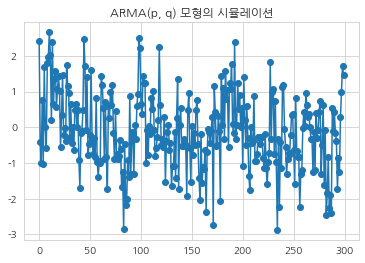

In [2]:
np.random.seed(0)
p1 = sm.tsa.ArmaProcess([1, -0.7], [1, -0.4])
y1 = p1.generate_sample(300, burnin=100)
plt.plot(y1, "o-")
plt.title("ARMA(p, q) 모형의 시뮬레이션")
plt.show()

다음은 위 ARMA(1,1) 모형의 자기상관계수함수다.

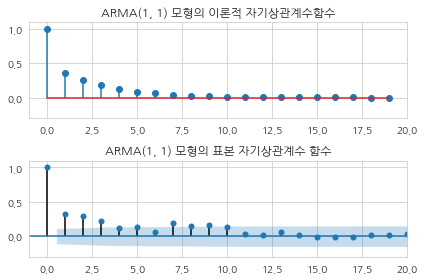

In [3]:
plt.subplot(211)
plt.stem(p1.acf(20), use_line_collection=True)
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1)
plt.title("ARMA(1, 1) 모형의 이론적 자기상관계수함수")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(y1, lags=20, ax=ax)
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1)
plt.title("ARMA(1, 1) 모형의 표본 자기상관계수 함수")

plt.tight_layout()
plt.show()